<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793546-Ariel-Corral-Leon/blob/main/10_morphological_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

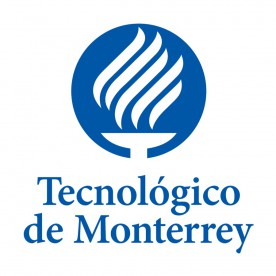



#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video (Gpo 10)**
###Tecnológico de Monterrey
### **Prof Dr. Gilberto Ochoa Ruiz**
### *4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas*

<center>

|   |   |
|---|---|
| Matrícula | Alumno|
| A01793474   | Juan Pablo Bladinieres Martin del Campo|
| A01793546  | José Ariel Corral|
| A01794050  | José Bernardo Moreno Villarreal|
| A01021190   | Ian André Ortega Suárez|
| A00143704   | Moisés Rangel Silva  |

</center>



# 10. Morphological Operations

## Table of Contents
1. [Preguntas]
2. [Pregunta #1]
3. [Pregunta #2] 
4. [Pregunta #3]
5. [Referencias](##Referencias:)


## Importing Libraries <a class="anchor" id="libraries" ></a>

In [22]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.utils.py3compat import iteritems

##Preguntas:

Para este ejercicio usaremos una imagen del proceso de inspección de soldadura con Rayos X en un Semiconductor:

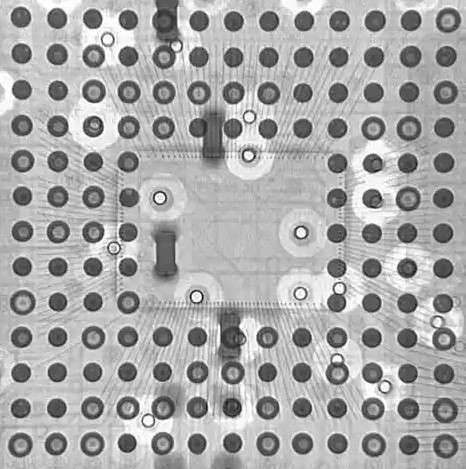

###A) Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

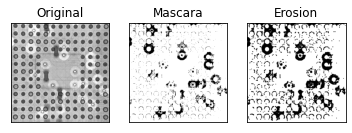

In [41]:
img = cv2.imread('/content/data/chip1.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img,220,255, cv2.THRESH_BINARY_INV)

kernal = np.ones((2,2), np.uint8)

erosion = cv2.erode(mask, kernal, iterations =2)

titulos = ['Original','Mascara','Erosion']
imagenes = [img,mask,erosion]

for i in range (3):
  plt.subplot (1,3,i+1),plt.imshow(imagenes[i], 'gray')
  plt.title(titulos[i])
  plt.xticks([]),plt.yticks([])

plt.show()

* *Este proceso nos permite acentuar ciertos bordes y hacerlos mucho mas facil de identificar, incluso reforzandolos y entre mas iteraciones empleemos este se acentuara más*

###B) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

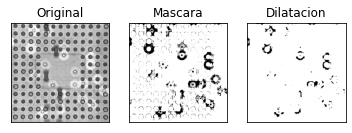

In [27]:
img = cv2.imread('/content/data/chip1.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img,220,255, cv2.THRESH_BINARY_INV)

kernal = np.ones((2,2), np.uint8)

dilatacion = cv2.dilate(mask,kernal, iterations=3)

titulos = ['Original','Mascara','Dilatacion']
imagenes = [img,mask,dilatacion]

for i in range (3):
  plt.subplot (1,3,i+1),plt.imshow(imagenes[i], 'gray')
  plt.title(titulos[i])
  plt.xticks([]),plt.yticks([])

plt.show()

* *Este proceso, lo podría describir como para ampliar los bordes y haciendolos mucho mas claros a simple vista, para ese ejemplo podemos ver como solo ciertos puntos son los que los bordes de soldadura estan "fríos", que son los que presentan una burbuja.*

###C) Investigar una aplicación de opening y closing e implementalo en Google Colab

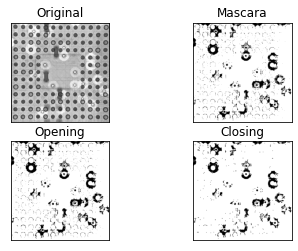

In [28]:
img = cv2.imread('/content/data/chip1.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img,220,255, cv2.THRESH_BINARY_INV)

kernal = np.ones((2,2), np.uint8)

opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE, kernal)

titulos = ['Original','Mascara','Opening','Closing']
imagenes = [img,mask,opening, closing]

for i in range (4):
  plt.subplot (2,2,i+1),plt.imshow(imagenes[i], 'gray')
  plt.title(titulos[i])
  plt.xticks([]),plt.yticks([])

plt.show()

* *Entre el opening y el closing, se estan llevando a cabo el reforzamiendo de los bordes que son muy semejantes al proceso de dilatación y erosion, pero que se encargan de los bordes mas suavizados*

###Realizando una comparación entre cada uno de los procesos:

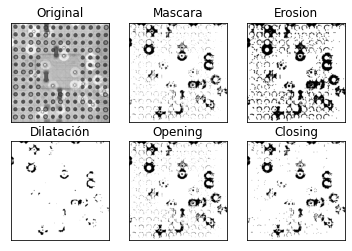

In [34]:
img = cv2.imread('/content/data/chip1.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img,220,255, cv2.THRESH_BINARY_INV)

kernal = np.ones((2,2), np.uint8)
erosion = cv2.erode(mask, kernal, iterations =2)
dilatacion = cv2.dilate(mask,kernal, iterations=3)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE, kernal)

titulos = ['Original','Mascara','Erosion','Dilatación','Opening','Closing']
imagenes = [img,mask,erosion,dilatacion,opening,closing]

for i in range (6):
  plt.subplot (2,3,i+1),plt.imshow(imagenes[i], 'gray')
  plt.title(titulos[i])
  plt.xticks([]),plt.yticks([])

plt.show()

### Incluyendo los procesos de procesamiento de imagen morfológicos de Top Hat & Black Hat:

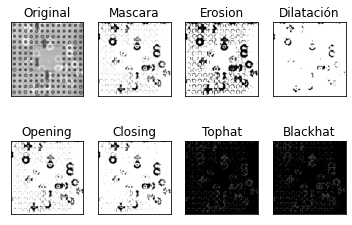

In [37]:
img = cv2.imread('/content/data/chip1.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img,220,255, cv2.THRESH_BINARY_INV)

kernal = np.ones((2,2), np.uint8)

erosion = cv2.erode(mask, kernal, iterations =2)
dilatacion = cv2.dilate(mask,kernal, iterations=3)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE, kernal)
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)
blackhat = cv2.morphologyEx(mask,cv2.MORPH_BLACKHAT,kernal)

titulos = ['Original','Mascara','Erosion','Dilatación','Opening','Closing','Tophat','Blackhat']
imagenes = [img,mask,erosion,dilatacion,opening,closing,tophat,blackhat]

for i in range (8):
  plt.subplot (2,4,i+1),plt.imshow(imagenes[i], 'gray')
  plt.title(titulos[i])
  plt.xticks([]),plt.yticks([])

plt.show()

## Conclusiones:

* *Como conclusiones, podemos identificar que el proceso de imagen puede ayudarnos con la ejecución de automatizaciones de procesos para descartar o confirmar la calidad de un producto, así mismo, podemos observar que el comportamiento de cada procesamiento, nos permite identificar patrones que para el ramo médico, le daría la herramienta adecuada a los medicos para optimizar los diagnósticos.*

* *Pueden ser variados los procesos y para hacerlo mucho mas sencillo de interpretar considero que el poder tener un proceso donde llevamos acabo una comparación u observación de un patron visual, podemos realizar la optimización de procesos de imagenes.*

* *Incluso durante el proceso de investigación, pude ver ciertos casos donde se pueden usar para el procesamiento de escritura y con ello poder hacer mucho mejor la interpretación de los caracteres.*

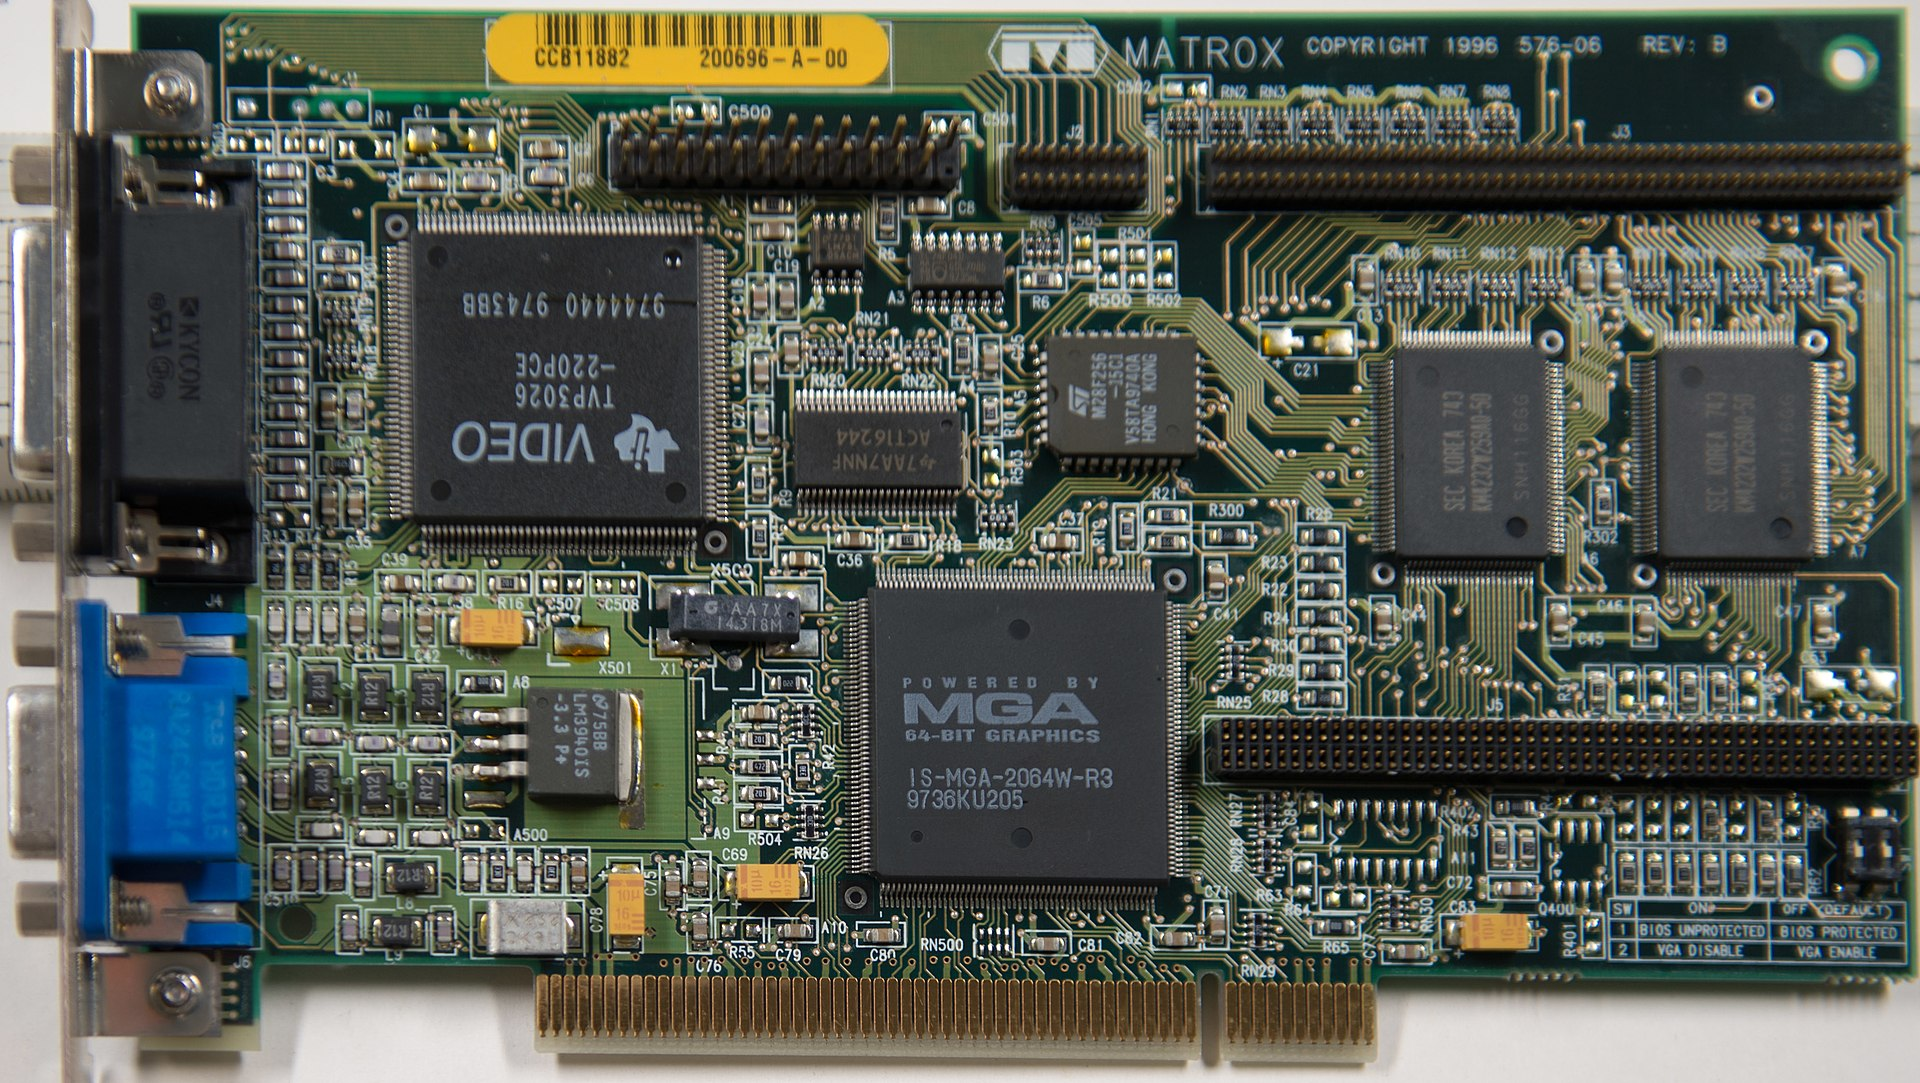


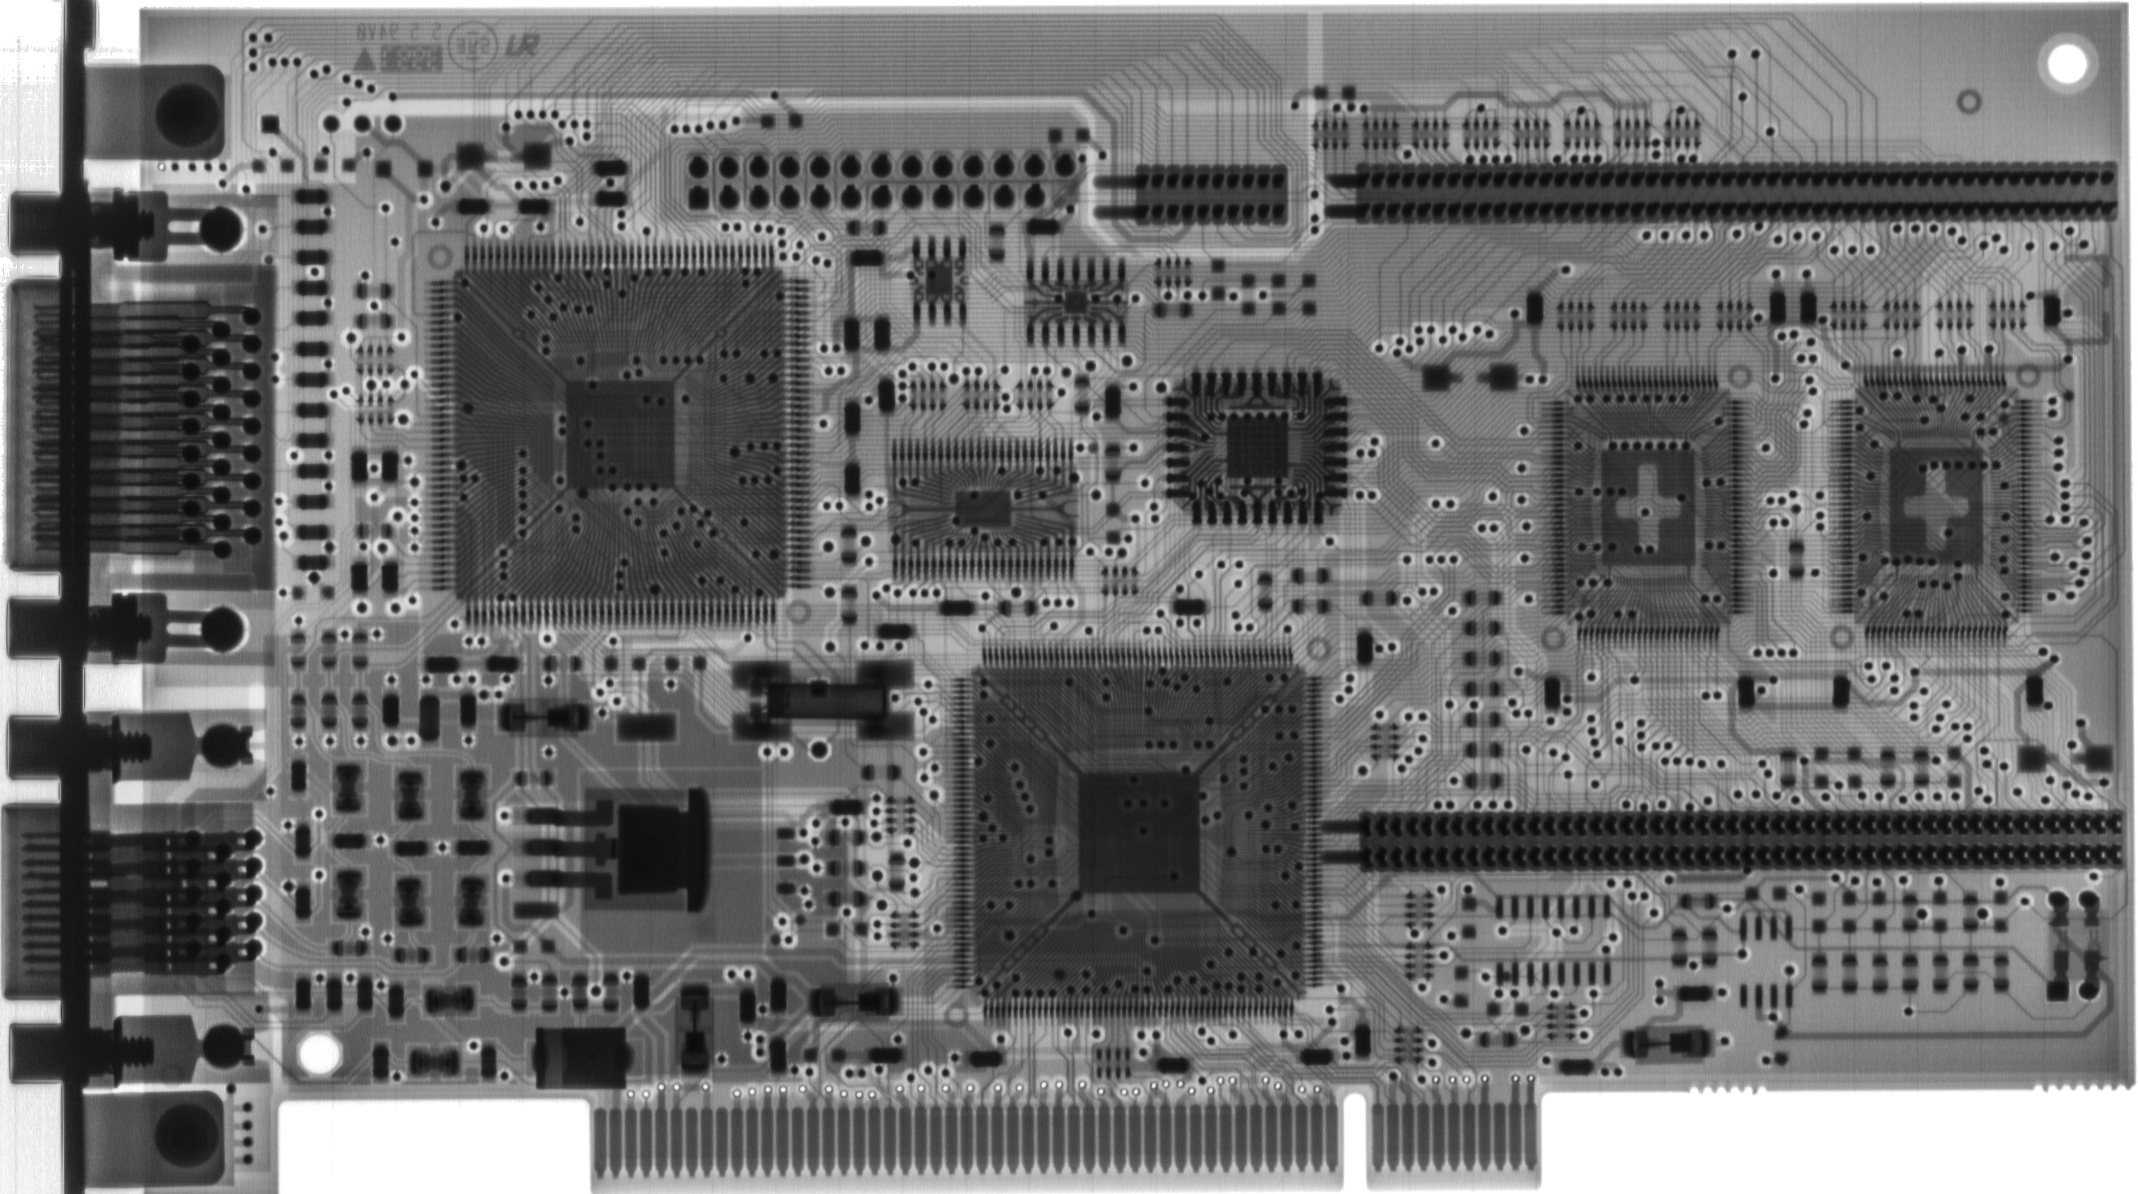

##Referencias:
* *OpenCV Morphological Operations. (2021, April 28). PyImageSearch. https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/*


* *OpenCV: Morphological Transformations. (n.d.). Docs.opencv.org. https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html*

* *Chhikara, P. (2022, April 3). Understanding Morphological Image Processing and Its Operations. Medium. https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756*

* *Singh, R. (2020, November 5). Morphological Transformations of Images using OpenCV | Image Processing Part-2. Analytics Vidhya. https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38*

* *Grobe, H. (2020, November 22). English: Circuit board, graphic card. Wikimedia Commons. https://commons.wikimedia.org/wiki/File:Vectra-xa-graphiccard-xray_hg.jpg#/media/File:Vectra-xa-graphiccard_hg.jpg*

* *X Line Series. (n.d.). Www.goepel.com. Retrieved February 3, 2023, from https://www.goepel.com/en/inspection-solutions/axi/x-ray-inspection-systems/x-line-series.html*
* ** 
* **
* **
